In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.figure(figsize=(20,10))
%matplotlib inline
import seaborn as sns
import sklearn
import scipy

In [2]:
missing_values=["na","N/A","missing"]
data = pd.read_csv("TrainingData.csv",na_values = missing_values)
data=data.drop(['application_key','mvar48'],axis=1)

In [3]:
data.dropna(axis=0, how='all')

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,C,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,L,1
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,C,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,L,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,1748.0,0.3044,0.000,0.0,0.0,0.0,20114.0,5574.0,77386.0,81647.0,...,0.0,NaN,8.445,0.04348,13.0,0.48002,0.0,0.0,L,0
82996,1846.0,NaN,0.000,0.0,0.0,793.0,18608.0,18608.0,63820.0,29187.0,...,0.0,NaN,NaN,0.00000,5.0,0.46925,NaN,0.0,L,0
82997,1907.0,0.0381,0.000,0.0,0.0,2478.0,24775.0,24775.0,100294.0,88249.0,...,0.0,137.164,42.857,0.00000,19.0,0.67960,NaN,0.0,L,0
82998,1744.0,1.8301,0.000,0.0,0.0,496.0,917.0,496.0,116164.0,2218.0,...,0.0,NaN,NaN,0.09375,3.0,0.45317,NaN,0.0,L,0


In [4]:
threshold = 0.6
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]
thresh=0.75
#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < thresh]

In [5]:
data['mvar1'].fillna(data['mvar1'].mean(),inplace=True)
data['mvar30'].fillna(data['mvar30'].mean(),inplace=True)
data['mvar44'].fillna(data['mvar44'].mean(),inplace=True)

In [6]:
data[['mvar2','mvar6','mvar7','mvar8','mvar9','mvar11','mvar12','mvar13','mvar15','mvar16','mvar17','mvar18','mvar21','mvar22','mvar23','mvar24','mvar25','mvar26','mvar27','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar39','mvar42','mvar43','mvar45','mvar46']] = data[['mvar2','mvar6','mvar7','mvar8','mvar9','mvar11','mvar12','mvar13','mvar15','mvar16','mvar17','mvar18','mvar21','mvar22','mvar23','mvar24','mvar25','mvar26','mvar27','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar39','mvar42','mvar43','mvar45','mvar46']].fillna(0)

In [7]:
data.isna().sum()/data.shape[0]*100

mvar1          0.0
mvar2          0.0
mvar3          0.0
mvar4          0.0
mvar5          0.0
mvar6          0.0
mvar7          0.0
mvar8          0.0
mvar9          0.0
mvar10         0.0
mvar11         0.0
mvar12         0.0
mvar13         0.0
mvar14         0.0
mvar15         0.0
mvar16         0.0
mvar17         0.0
mvar18         0.0
mvar19         0.0
mvar20         0.0
mvar21         0.0
mvar22         0.0
mvar23         0.0
mvar24         0.0
mvar25         0.0
mvar26         0.0
mvar27         0.0
mvar28         0.0
mvar29         0.0
mvar30         0.0
mvar32         0.0
mvar33         0.0
mvar34         0.0
mvar35         0.0
mvar36         0.0
mvar37         0.0
mvar38         0.0
mvar39         0.0
mvar42         0.0
mvar43         0.0
mvar44         0.0
mvar45         0.0
mvar46         0.0
mvar47         0.0
default_ind    0.0
dtype: float64

In [8]:
encoded_columns = pd.get_dummies(data['mvar47'])
data = data.join(encoded_columns).drop('mvar47', axis=1)

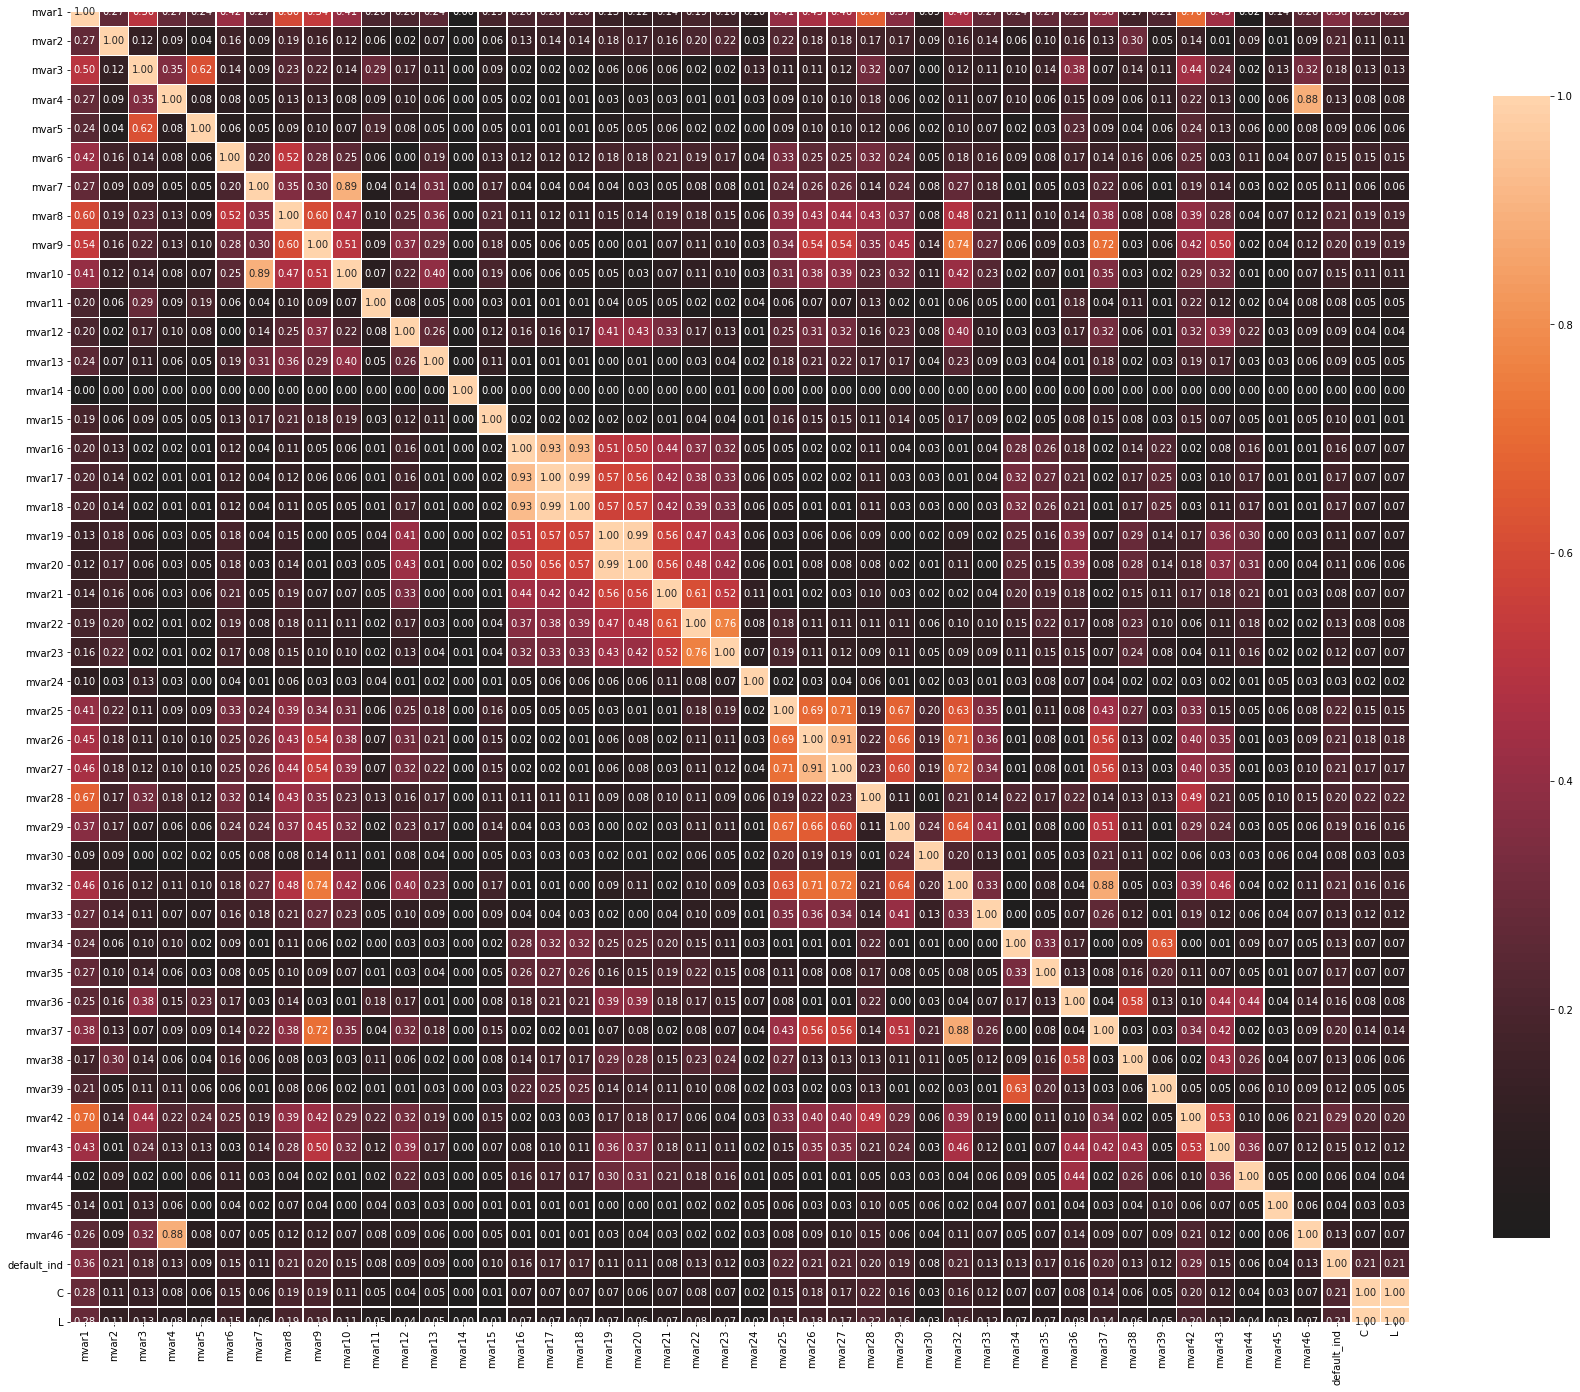

In [9]:
correlations = data.corr().abs()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [10]:
columns = np.full((correlations.shape[0],), True, dtype=bool)
for i in range(43):
    for j in range(i+1, correlations.shape[0]):
        if correlations.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [11]:
cols=data.columns

In [12]:
from scipy.stats.mstats import winsorize

df = winsorize(data,limits=[0.05,0.05])

In [13]:
data=pd.DataFrame(df)

In [14]:
X = data.iloc[:, data.columns != 36] # Features
y = data.iloc[:,36]
y

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
82460    0.0
82461    0.0
82462    0.0
82463    0.0
82464    0.0
Name: 36, Length: 82465, dtype: float64

In [15]:
d=pd.DataFrame(X)

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [18]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

Using TensorFlow backend.
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflo

In [19]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (88354, 38)
After OverSampling, the shape of train_y: (88354,) 

After OverSampling, counts of label '1': 44177
After OverSampling, counts of label '0': 44177


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,max_depth=10)
classifier.fit( X_train_res, y_train_res )
y_rf = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_rf )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))
print("fScore:",metrics.f1_score(y_test, y_rf))
print("precision : ",metrics.precision_score(y_test, y_rf))

Accuracy on Test Set for RandomForest = 0.72
Mean RandomForest CrossVal Accuracy on Train Set 0.77, with std=0.00
fScore: 0.577399036680252
precision :  0.5216925549009106


In [22]:
class_weight = {0: 1,
                1: 1.3} 
#Increasing value of weight for 1 increases f1 (recall) but reduces precision and accuracy

In [23]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(class_weight = class_weight)
classifier2.fit( X_train, y_train )
y_lr = classifier2.predict( X_test )

cm = confusion_matrix( y_test, y_lr )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))
print("fScore:",metrics.f1_score(y_test, y_lr))
print("precision : ",metrics.precision_score(y_test, y_lr))

/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on Test Set for LogReg = 0.76


/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Mean LogReg CrossVal Accuracy on Train Set 0.76, with std=0.00
fScore: 0.5462238984454052
precision :  0.6129232039636664


In [24]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_gnb = classifier3.predict( X_test )
cm = confusion_matrix( y_test, y_gnb )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))
print("fScore:",metrics.f1_score(y_test, y_gnb))
print("precision : ",metrics.precision_score(y_test, y_gnb))

Accuracy on Test Set for NBClassifier = 0.71
Mean NaiveBayes CrossVal Accuracy on Train Set 0.72, with std=0.00
fScore: 0.5709077652205615
precision :  0.5092351716961498


In [25]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from functools import partial
from sklearn.metrics import f1_score

/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
space = [
    Real(0.3, 0.7, name="colsample_bylevel"),
    Real(0.3, 0.7, name="colsample_bytree"),
    Real(0.01, 1, name="gamma"),
    Real(0.0001, 1, name="learning_rate"),
    Real(0.1, 10, name="max_delta_step"),
    Integer(3, 15, name="max_depth"),
    Real(5, 500, name="min_child_weight"),
    Integer(10, 100, name="n_estimators"),
    Real(0.1, 100, name="reg_alpha"),
    Real(0.1, 100, name="reg_lambda"),
    Real(0.3, 0.7, name="subsample"),
]

In [27]:
def return_model_assessment(args, X_train_res, y_train_res, X_test):
    global models, train_scores, test_scores, curr_model_hyper_params
    params = {curr_model_hyper_params[i]: args[i] for i, j in enumerate(curr_model_hyper_params)}
    model = XGBClassifier(random_state=42, seed=42)
    model.set_params(**params)
    fitted_model = model.fit(X_train, y_train, sample_weight=None)
    models.append(fitted_model)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_score = f1_score(train_predictions, y_train)
    test_score = f1_score(test_predictions, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    return 1 - test_score

In [28]:
curr_model_hyper_params

NameError: name 'curr_model_hyper_params' is not defined

In [ ]:
missing_values=["na","N/A","missing"]
testip = pd.read_csv("test.csv",na_values = missing_values)
testip=testip.drop(['application_key','mvar48'],axis=1)

In [ ]:
testip.isna().sum()/testip.shape[0]*100 

In [ ]:
threshold = 0.6
#Dropping columns with missing value rate higher than threshold
testip = testip[testip.columns[testip.isnull().mean() < threshold]]

In [ ]:
#imputing mvar1 with it's mean
testip['mvar1'].fillna(testip['mvar1'].mean(),inplace=True)
#imputing with 0
testip[['mvar6','mvar7','mvar8','mvar9','mvar10','mvar11','mvar12','mvar13','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar24','mvar25','mvar26','mvar27','mvar28','mvar29','mvar30','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39','mvar42','mvar43','mvar44','mvar45','mvar46']] = testip[['mvar6','mvar7','mvar8','mvar9','mvar10','mvar11','mvar12','mvar13','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar24','mvar25','mvar26','mvar27','mvar28','mvar29','mvar30','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39','mvar42','mvar43','mvar44','mvar45','mvar46']].fillna(0)

In [ ]:
testip.fillna(testip.median(),inplace=True)

In [ ]:
encoded_columns = pd.get_dummies(testip['mvar47'])
testip = testip.join(encoded_columns).drop('mvar47', axis=1)

In [ ]:
columns = np.full((corre.shape[0],), True, dtype=bool)
for i in range(43):
    for j in range(i+1, corre.shape[0]):
        if corre.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_col = testip.columns[columns]
testip = testip[selected_col] 

In [ ]:
from scipy.stats.mstats import winsorize

ttf = winsorize(testip,limits=[0.1,0.1])

In [ ]:
tip=pd.DataFrame(ttf)

In [ ]:
X_fsub = tip.iloc[:,:] # Features

In [ ]:
from sklearn.preprocessing import StandardScaler
rob=StandardScaler()
X_fsub=rob.fit_transform(X_fsub)

In [ ]:
y_predsub1 = classifier2.predict(X_fsub)